In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

1.13.0-dev20190126


In [4]:
# import tensorflow as tf

# img = tf.placeholder(name="img", dtype=tf.float32, shape=(1, 64, 64, 3))
# var = tf.get_variable("weights", dtype=tf.float32, shape=(1, 64, 64, 3))
# val = img + var
# out = tf.identity(val, name="out")

# with tf.Session() as sess:
#   sess.run(tf.global_variables_initializer())
#   converter = tf.lite.TFLiteConverter.from_session(sess, [img], [out])
#   tflite_model = converter.convert()
#   open("converted_model.tflite", "wb").write(tflite_model)

W0127 13:28:28.922559 4474193344 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/lite/python/lite.py:636: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
W0127 13:28:28.923194 4474193344 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/framework/graph_util_impl.py:245: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph


This is save
Saved
Tensorflow Lite Converted


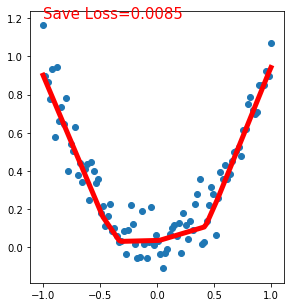

In [10]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o = tf.layers.dense(l, 1)                     # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  # initialize var in graph

    saver = tf.train.Saver()  # define a saver for saving and restoring

    for step in range(1000):                             # train
        sess.run(train_op, {tf_x: x, tf_y: y})

    save_path = saver.save(sess, "my_net/model.ckpt")
    tf.train.write_graph(sess.graph_def, '', 'graph.pb')
    print('Saved')
    
    converter = tf.lite.TFLiteConverter.from_session(sess,[tf_x], [o])
    tflite_model = converter.convert()
    open("converted_model.tflite", "wb").write(tflite_model)
    print('Tensorflow Lite Converted')

    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})


def reload():
    print('This is reload')
    # build entire net again and restore
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o_ = tf.layers.dense(l_, 1)                     # output layer
    loss_ = tf.losses.mean_squared_error(tf_y, o_)   # compute cost

    sess = tf.Session()
    # don't need to initialize variables, just restoring trained variables
    saver = tf.train.Saver()  # define a saver for saving and restoring
    # saver.restore(sess, './params')
    saver.restore(sess, "my_net/save_net.ckpt")
    print('Reloaded')

    # plotting
    pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()


save()

# destroy previous net
tf.reset_default_graph()

# reload()

